In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
single_image= X_train[0]

In [24]:
single_image.shape

(28, 28)

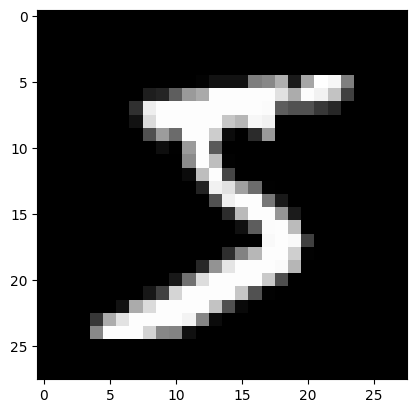

In [25]:
plt.imshow(single_image,cmap='gray')

In [26]:
y_train.shape

(60000,)

In [27]:
X_train.min()

0

In [28]:
X_train.max()

255

In [29]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [30]:
X_train_scaled.min()

0.0

In [31]:
X_train_scaled.max()

1.0

In [32]:
y_train[0]

5

In [33]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [34]:
type(y_train_onehot)

numpy.ndarray

In [35]:
y_train_onehot.shape

(60000, 10)

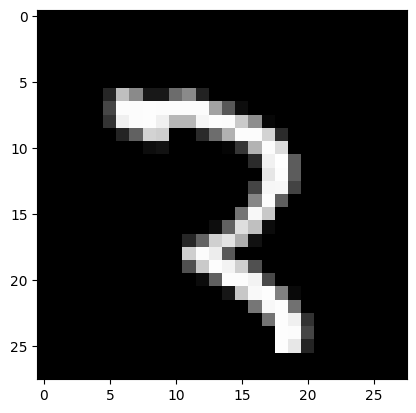

In [36]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [37]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [38]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [39]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,618 (596.16 KB)

 Trainable params: 152,618 (596.16 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='categorical_crossentropy', # Loss function for multi-class classification
              optimizer='adam', # A popular optimization algorithm
              metrics=['accuracy']) # Metric to evaluate model performance

In [42]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 68ms/step - accuracy: 0.8691 - loss: 0.4173 - val_accuracy: 0.9765 - val_loss: 0.0706
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 62ms/step - accuracy: 0.9821 - loss: 0.0615 - val_accuracy: 0.9833 - val_loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9857 - val_loss: 0.0434
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 63ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9865 - val_loss: 0.0422
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9878 - val_loss: 0.0354


In [44]:
metrics = pd.DataFrame(model.history.history)

In [45]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.941133,0.195906,0.9765,0.070575
1,0.982633,0.057769,0.9833,0.050544
2,0.987550,0.040039,0.9857,0.043372
3,0.990250,0.031626,0.9865,0.042186
4,0.991950,0.025414,0.9878,0.035410


SUDHAKAR K 
212222240107


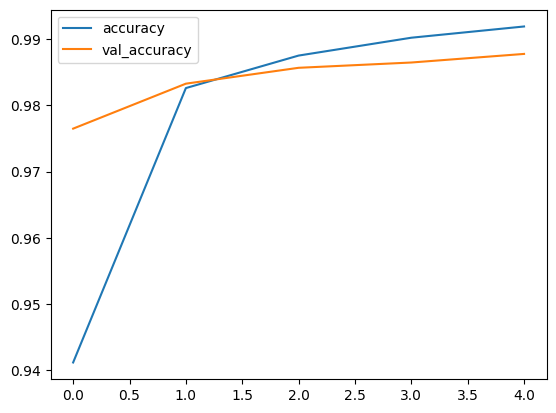

In [67]:
metrics[['accuracy','val_accuracy']].plot()
print("SUDHAKAR K \n212222240107")

SUDHAKAR K 
212222240107


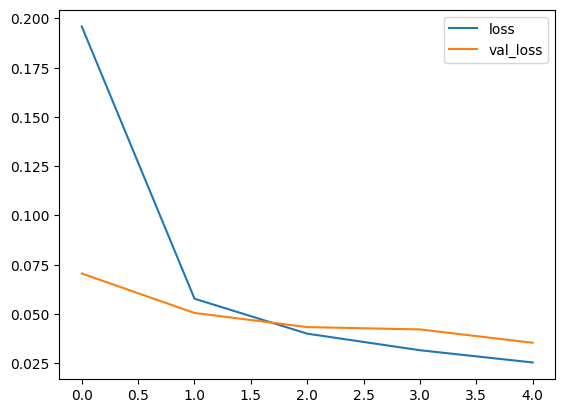

In [70]:
metrics[['loss','val_loss']].plot()
print("SUDHAKAR K \n212222240107")

In [48]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [69]:
print(confusion_matrix(y_test,x_test_predictions))
print("SUDHAKAR K \n212222240107")

[[ 978    0    1    1    0    0    0    0    0    0]
 [   0 1130    1    0    0    1    2    0    1    0]
 [   1    3 1011    1    1    0    0   12    3    0]
 [   0    0    2  998    0    9    0    0    1    0]
 [   0    0    0    0  977    0    0    0    0    5]
 [   1    0    0    4    0  885    1    0    1    0]
 [   6    3    0    0    2    5  939    0    3    0]
 [   0    1    3    3    0    1    0 1016    1    3]
 [   5    0    0    0    0    1    1    2  961    4]
 [   2    2    0    1    9    3    0    5    4  983]]
SUDHAKAR K 
212222240107


In [68]:
print(classification_report(y_test,x_test_predictions))
print("SUDHAKAR K \n212222240107")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

SUDHAKAR K 
212222240107


In [52]:
img = image.load_img('imageeight.png')

In [53]:
type(img)

PIL.Image.Image

In [54]:
img = image.load_img('imageeight.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [55]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [56]:
print(x_single_prediction)

[4]


SUDHAKAR K 
212222240107


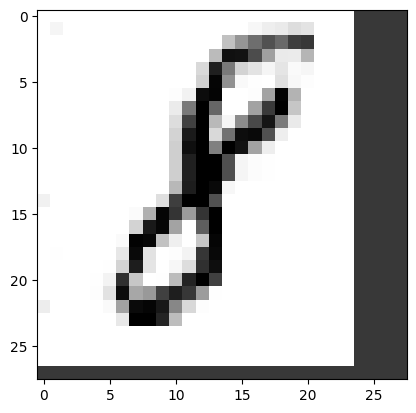

In [71]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("SUDHAKAR K \n212222240107")

In [59]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [60]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [61]:
print(x_single_prediction)

[8]
